In [238]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

## 1. Get the Data

### 1.1 Loading into DataFrame

In [239]:
fish_data = pd.read_csv('data/fish-dataset.csv')
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1.2 Take a Quick Look at the Data Structure and other stats

In [240]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [241]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [242]:
# Counting species
fish_data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

#### Visualizing Numerical attributes|

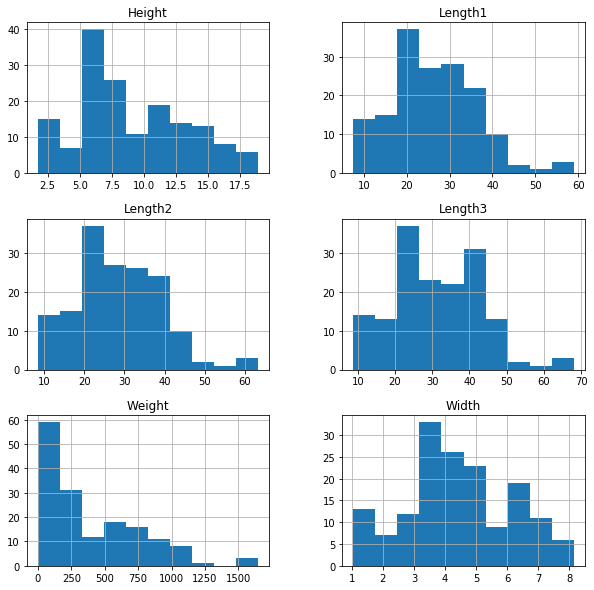

In [243]:
fish_data.drop('Species', axis=1).hist(figsize=(10, 10))
plt.show()

#### Observations
- CGS units are used
- Species is categorical and rest of them numerical
- Target is weight of the fish
- Graphs of weight is skewed
- Length1, Length2, Length3 graphs are similar
- Weight and height graphs are similar

### 1.3 Creating a test set
- We will create a test_set by stratifying labels

In [244]:
split = StratifiedShuffleSplit(n_splits=1,
                              test_size=0.2,
                              random_state=3)

for train_index, test_index in split.split(fish_data, fish_data['Species']):
    train_set = fish_data.loc[train_index]
    test_set= fish_data.loc[test_index]

In [245]:
## Cross-checking the equal divisions of groups
display(train_set.Species.value_counts()/train_set.shape[0])
display(test_set.Species.value_counts()/test_set.shape[0])

Perch        0.354331
Bream        0.220472
Roach        0.125984
Pike         0.102362
Smelt        0.086614
Parkki       0.070866
Whitefish    0.039370
Name: Species, dtype: float64

Perch        0.34375
Bream        0.21875
Roach        0.12500
Pike         0.12500
Smelt        0.09375
Parkki       0.06250
Whitefish    0.03125
Name: Species, dtype: float64

## 2. Discover and Visualize the Data to Gain Insights

In [246]:
# Make sure inorder to experiment few things you copy the data into another dataframe

fish = train_set.copy()

### 2.1 Visualizing Numerical Features
- Pairplot
- Heatmap
- Categorical Feature visualizing

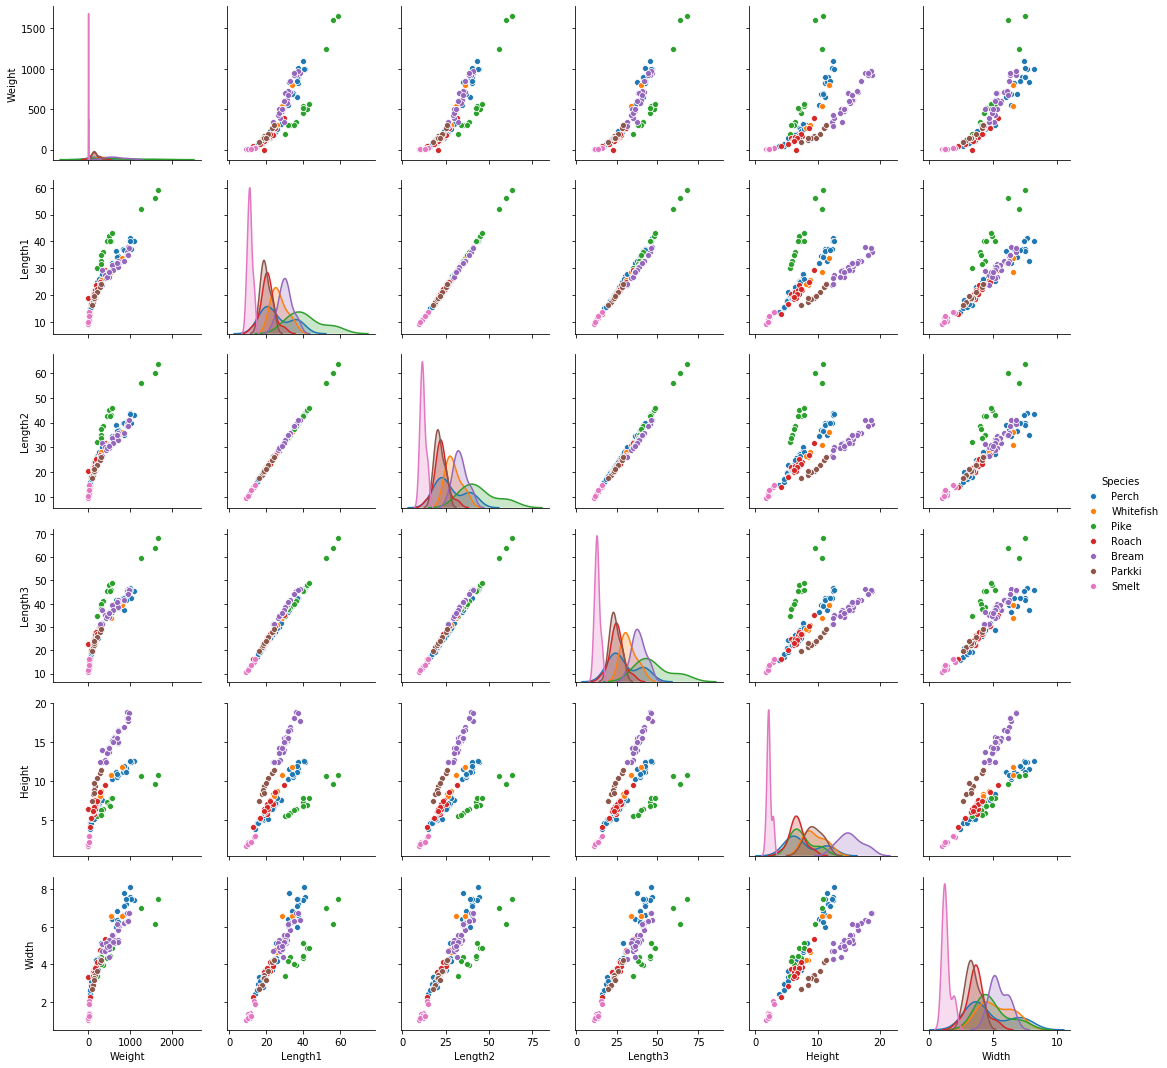

In [247]:
# PairPlot

sns.pairplot(fish, hue='Species')

In [248]:
# Correlation of input features with the target variable (Weight)

fish.corr()['Weight'].sort_values(ascending=False)

Weight     1.000000
Length3    0.918862
Length2    0.912630
Length1    0.908836
Width      0.892474
Height     0.737894
Name: Weight, dtype: float64

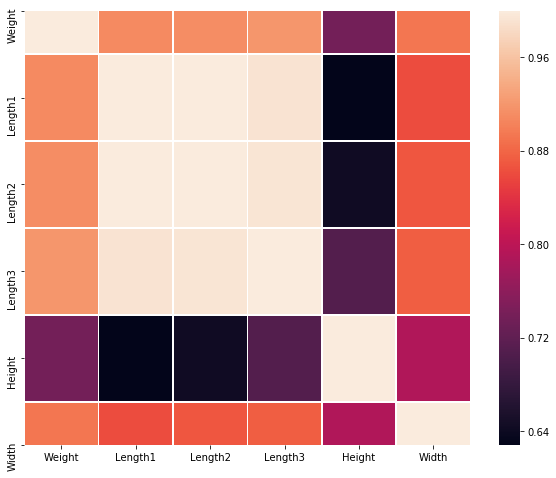

In [249]:
# Heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(fish.corr(), linewidths=0.5)
plt.show()

### 2.2 Visualizing categorical variables


<BarContainer object of 7 artists>

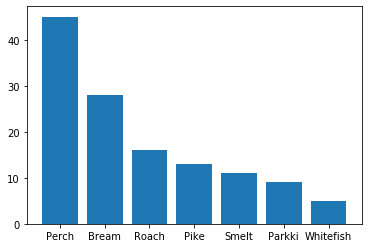

In [250]:
# Using matplotlib
species = fish['Species'].value_counts()
plt.bar(species.index, species)

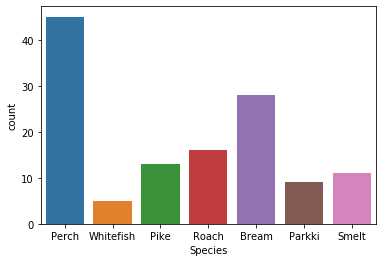

In [251]:
# Alternate way using seaborn
sns.countplot(x=fish['Species'])

#### Observations
- Most promising features are Length(1/2/3)

### 2.3 Experimenting with attributes combination

In [252]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
127,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958
58,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
102,Perch,300.0,25.2,27.3,28.7,8.3230,5.1373
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [253]:
# Trying out Weight/Other lengths

fish['Height*Width'] = fish['Height']*fish['Width']
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Height*Width
127,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958,94.862427
58,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620,70.502128
102,Perch,300.0,25.2,27.3,28.7,8.3230,5.1373,42.757748
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800,80.873760
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720,14.087304


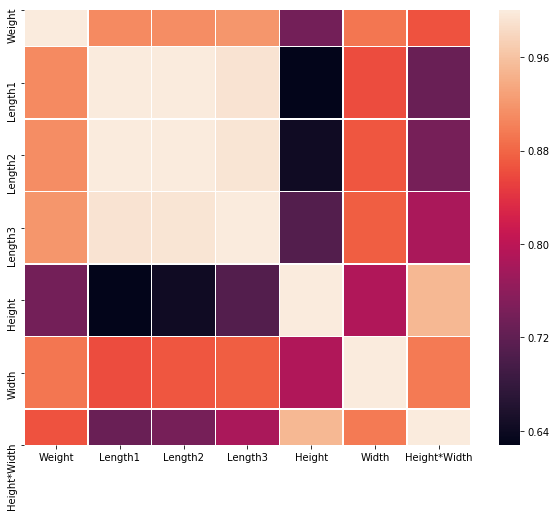

In [254]:
# Plotting Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(fish.corr(), linewidths=0.5)

Weight          1.000000
Length3         0.918862
Length2         0.912630
Length1         0.908836
Width           0.892474
Height*Width    0.865144
Height          0.737894
Name: Weight, dtype: float64


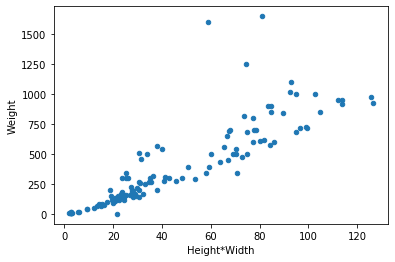

In [255]:
print(fish.corr()['Weight'].sort_values(ascending=False))
fish.plot(kind='scatter', x= 'Height*Width', y='Weight')

#### Observations
- Turns out, Weight/Other lengths are more promising for predictions

In [256]:
## Putting the fish df data back as it was before
fish.drop('Height*Width', axis=1, inplace=True)

## 3. Prepare the Data for ML Algorithms

### 3.1 Data Cleaning

- As there are null values and very few outliers, this step is skipped for this project

In [257]:
# Defining all Features (categorical or Numerical) and Targets
DATASET_NUM_FEATURES = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
DATASET_CAT_FEATURES = ['Species']
DATASET_FEATURES = DATASET_NUM_FEATURES + DATASET_CAT_FEATURES
DATASET_TARGET = ['Weight']

fish_num = fish[DATASET_NUM_FEATURES].copy()
fish_cat = fish[DATASET_CAT_FEATURES].copy()
fish_train = fish[DATASET_FEATURES]
fish_labels = fish[DATASET_TARGET].copy()

### 3.2 Handling categorical and text attributes
- Perform OneHotEncoding on Species column

In [258]:
# Experimenting with fish_cat to try out OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()

fish_cat = onehot.fit_transform(fish_cat)

In [259]:
fish_cat.toarray()
fish_num.head()

,Length1,Length2,Length3,Height,Width
127,41.1,44.0,46.6,12.4888,7.5958
58,28.5,31.0,34.0,10.7440,6.5620
102,25.2,27.3,28.7,8.3230,5.1373
144,59.0,63.4,68.0,10.8120,7.4800
81,18.2,20.0,21.0,5.0820,2.7720


### 3.3 Custom Transformer
- Building a Transformer which adds extra features to the dataset

In [260]:
# Building Transformer
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_col, combine_with_col):
        self.attribute_col = attribute_col
        self.combine_with_col = combine_with_col
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        for col in self.combine_with_col:
            X = np.append(X, (X[:, self.attribute_col] * X[:, col]).reshape(-1,1), axis=1)
        return X
    
            

In [261]:
## Trying out Custom Transformer
attr_adder = AttributesAdder(attribute_col=3, combine_with_col=(4,))
sample = attr_adder.transform(fish_num.values)
sample[:10]

array([[ 41.1       ,  44.        ,  46.6       ,  12.4888    ,
          7.5958    ,  94.86242704],
       [ 28.5       ,  31.        ,  34.        ,  10.744     ,
          6.562     ,  70.502128  ],
       [ 25.2       ,  27.3       ,  28.7       ,   8.323     ,
          5.1373    ,  42.7577479 ],
       [ 59.        ,  63.4       ,  68.        ,  10.812     ,
          7.48      ,  80.87376   ],
       [ 18.2       ,  20.        ,  21.        ,   5.082     ,
          2.772     ,  14.087304  ],
       [ 20.4       ,  22.        ,  24.7       ,   5.8045    ,
          3.7544    ,  21.7924148 ],
       [ 25.4       ,  27.5       ,  28.9       ,   7.0516    ,
          4.335     ,  30.568686  ],
       [ 38.        ,  41.        ,  46.5       ,  17.6235    ,
          6.3705    , 112.27050675],
       [ 29.5       ,  32.        ,  37.3       ,  13.9129    ,
          5.0728    ,  70.57735912],
       [ 26.9       ,  28.7       ,  30.1       ,   7.5852    ,
          4.6354    ,  35.1

### 3.4 Feature Scaling

In [262]:
fish_num.describe()

,Length1,Length2,Length3,Height,Width
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,26.159055,28.337008,31.167717,8.996850,4.423856
std,9.472126,10.162457,11.068609,4.248501,1.632690
min,9.300000,9.800000,10.800000,1.738800,1.047600
25%,19.350000,21.150000,23.350000,6.110000,3.467700
50%,25.000000,27.000000,29.300000,7.786000,4.239000
75%,32.250000,35.000000,39.450000,12.153200,5.320200
max,59.000000,63.400000,68.000000,18.754200,8.142000


In [263]:
# Experimenting with fish_num to try out StandardScaler

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
fish_scaled = std_scaler.fit_transform(fish_num.values)
fish_scaled[:5]

array([[ 1.5836062 ,  1.54736444,  1.39976048,  0.82518023,  1.95046595],
       [ 0.24811917,  0.26307996,  0.25689772,  0.41286773,  1.3147701 ],
       [-0.10165124, -0.10244716, -0.22383026, -0.15923713,  0.43870521],
       [ 3.48084572,  3.46391206,  3.34081311,  0.42893676,  1.87925916],
       [-0.84358848, -0.8236223 , -0.9222464 , -0.92511562, -1.01574574]])

### 3.5 Transformation Pipelines
- First, we will build numeric attributes transformation pipeline
- Second, we will build categorical attributes transformation
- Finally we merge them together

#### 3.5.1 Numerical Feature Pipeline

In [264]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('attr_adder', AttributesAdder(attribute_col=3, combine_with_col=(4,)))
])

#### 3.5.2 Building the whole Pipeline

In [265]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, DATASET_NUM_FEATURES),
    ('cat', OneHotEncoder(), DATASET_CAT_FEATURES)
])

In [266]:
fish_train_prepared = full_pipeline.fit_transform(fish_train)

In [267]:
fish_prepared[:10]

array([[ 1.5836062 ,  1.54736444,  1.39976048,  0.82518023,  1.95046595,
         0.42306826,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.24811917,  0.26307996,  0.25689772,  0.41286773,  1.3147701 ,
         0.31402276,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-0.10165124, -0.10244716, -0.22383026, -0.15923713,  0.43870521,
        -0.36297067,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 3.48084572,  3.46391206,  3.34081311,  0.42893676,  1.87925916,
         0.2282478 ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [-0.84358848, -0.8236223 , -0.9222464 , -0.92511562, -1.01574574,
         0.9107748 ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.61040821, -0.626040

## 4. Select and Train a Model

### 4.1 Training and Evaluating on the Training Set

#### Linear Regression Model

In [268]:
fish_train.head()

,Length1,Length2,Length3,Height,Width,Species
127,41.1,44.0,46.6,12.4888,7.5958,Perch
58,28.5,31.0,34.0,10.7440,6.5620,Whitefish
102,25.2,27.3,28.7,8.3230,5.1373,Perch
144,59.0,63.4,68.0,10.8120,7.4800,Pike
81,18.2,20.0,21.0,5.0820,2.7720,Perch


In [269]:
## Trying Linear Regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(fish_prepared, fish_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [270]:
## Making Predictions
sample_pred_lr = lin_reg.predict(fish_prepared)

print('Actual values :\n',fish_labels[:10].values)
print('Predicted values :\n',sample_pred[:10])

Actual values :
 [[1000.]
 [ 540.]
 [ 300.]
 [1650.]
 [  85.]
 [ 150.]
 [ 265.]
 [ 950.]
 [ 340.]
 [ 300.]]
Predicted values :
 [[1007.78912227]
 [ 515.75305887]
 [ 343.16288703]
 [1477.48761892]
 [  31.68115317]
 [ 141.58135946]
 [ 328.20410474]
 [ 887.66422916]
 [ 544.5716632 ]
 [ 340.24378021]]


In [271]:
## Score of the Model
from sklearn.metrics import mean_squared_error as MSE

mse_err = MSE(sample_pred_lr, fish_labels)
print('RMSE :', mse_err ** 0.5)

RMSE : 79.37879857898103


#### Decision Tree Model

In [272]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(fish_prepared, fish_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [273]:
## Making Predictions
sample_pred_dt = tree_reg.predict(fish_prepared)

print('Actual values :\n',fish_labels[:10].values)
print('Predicted values :\n',sample_pred_dt[:10])

Actual values :
 [[1000.]
 [ 540.]
 [ 300.]
 [1650.]
 [  85.]
 [ 150.]
 [ 265.]
 [ 950.]
 [ 340.]
 [ 300.]]
Predicted values :
 [1000.  540.  300. 1650.   85.  150.  265.  950.  340.  300.]


In [274]:
## Score of the Model
from sklearn.metrics import mean_squared_error as MSE

mse_err = MSE(sample_pred_dt, fish_labels)
print('RMSE :', mse_err ** 0.5)

RMSE : 0.0


#### Observations:
- The Tree model has badly overfit the data
- Use cross-validation for model tuning.

#### Random Forest Model

In [275]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(fish_prepared, np.ravel(fish_labels))

/home/prakhar/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [276]:
## Making Predictions
sample_pred_rf = rf_reg.predict(fish_prepared)

print('Actual values :\n',fish_labels[:10].values)
print('Predicted values :\n',sample_pred_rf[:10])

Actual values :
 [[1000.]
 [ 540.]
 [ 300.]
 [1650.]
 [  85.]
 [ 150.]
 [ 265.]
 [ 950.]
 [ 340.]
 [ 300.]]
Predicted values :
 [1020.   565.   335.  1540.    76.5  147.   275.   947.5  388.   292.2]


In [277]:
## Score of the Model
from sklearn.metrics import mean_squared_error as MSE

mse_err = MSE(sample_pred_rf, fish_labels)
print('RMSE :', mse_err ** 0.5)

RMSE : 29.224435641816548


#### Observations
- Promising model

### 4.2 Better Evaluation Using Cross-Validation

In [278]:
def display_scores(model_name ,scores):
    print('------', model_name, '-------')
    print('Scores:\n', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [279]:
### Models used until now
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
models = [lin_reg, tree_reg, rf_reg]

In [280]:
# Performing 5-CV score
from sklearn.model_selection import cross_val_score


for model_name, model in zip(model_names, models):
    scores = cross_val_score(model, fish_prepared, np.ravel(fish_labels),
                            scoring = 'neg_mean_squared_error', cv=10)
    display_scores(model_name, (-scores) ** 0.5)
    print('\n')

------ Linear Regression -------
Scores:
 [ 99.67686854  61.79264783 110.91896839  89.55957481 101.91316479
  62.90149051  80.51636978  61.23479649 155.54216946  77.41625847]
Mean: 90.1472309071846
Standard Deviation: 27.522049997433804


------ Decision Tree Regressor -------
Scores:
 [ 68.1485933   49.91300124 113.68690473  81.18639522  85.16518339
  70.58167119  73.17313504  50.86404264 134.64733256  30.57811036]
Mean: 75.79443696781124
Standard Deviation: 29.059902065661266


------ Random Forest Regressor -------
Scores:
 [135.41673286  46.08480477  47.11956722  75.87695505  56.75800486
  47.10919688  74.61000655  25.68136906 135.63331474  29.49542182]
Mean: 67.3785373805084
Standard Deviation: 37.38141652169642




## 5. Fine tuning the model

### 5.1 Grid Search : Random Forest

In [281]:
# Using GridSearchCV to tune the Random Forest model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap':[True,False], 'n_estimators':[3,10,30, 40], 'max_features':[2,3,4, 6,8]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(fish_prepared, np.ravel(fish_labels))

/home/prakhar/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [True, False],
  

In [282]:
# Best score
np.sqrt(-grid_search.best_score_)

63.87893010442558

In [283]:
# Best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [284]:
# Best selection of parameters
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

In [285]:
# Looking at the cv scores

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

108.35232763022279 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
72.45174242428514 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
81.85980167393663 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
77.67940916560146 {'bootstrap': True, 'max_features': 2, 'n_estimators': 40}
134.87289308025913 {'bootstrap': True, 'max_features': 3, 'n_estimators': 3}
74.07429037451651 {'bootstrap': True, 'max_features': 3, 'n_estimators': 10}
77.6068965691878 {'bootstrap': True, 'max_features': 3, 'n_estimators': 30}
76.32877239111245 {'bootstrap': True, 'max_features': 3, 'n_estimators': 40}
114.77169208296553 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
76.09174054219129 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
76.30037506343365 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
87.11512182220963 {'bootstrap': True, 'max_features': 4, 'n_estimators': 40}
90.33112766190797 {'bootstrap': True, 'max_features': 6, 'n_estimators': 3}
8

### 5.2 Analyze the Best Models and Their Errors

In [286]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.03209841e-01, 1.48207294e-01, 2.99994136e-01, 1.02397114e-01,
       3.13135386e-01, 1.27849739e-02, 6.42050372e-03, 1.20146545e-03,
       5.75503675e-04, 1.08043259e-02, 2.41912365e-04, 5.74070144e-04,
       4.53473450e-04])

In [287]:
extra_attributes = ['Height*Width']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
all_features = DATASET_NUM_FEATURES + extra_attributes + cat_one_hot_attribs

# Printing Feature importances along with Feature name
sorted(zip(feature_importances, all_features), reverse=True)

[(0.31313538649108064, 'Width'),
 (0.2999941359473767, 'Length3'),
 (0.14820729385499062, 'Length2'),
 (0.1032098408036845, 'Length1'),
 (0.10239711429261217, 'Height'),
 (0.012784973896192308, 'Height*Width'),
 (0.010804325915858322, 'Pike'),
 (0.006420503716876232, 'Bream'),
 (0.0012014654474705687, 'Parkki'),
 (0.0005755036747445054, 'Perch'),
 (0.0005740701442424407, 'Smelt'),
 (0.0004534734502584399, 'Whitefish'),
 (0.00024191236461254024, 'Roach')]

### 4.5 Evaluate your system on the Test Set

In [288]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('Weight', axis=1)
y_test = test_set['Weight']

X_test_prepared = full_pipeline.fit_transform(X_test)
y_pred = final_model.predict(X_test_prepared)

print('RMSE :', MSE(y_test, y_pred) ** 0.5)

RMSE : 114.4810533875463


In [289]:
##
print('Actual :\n', y_test[:10].values)
print('Predictions: \n', y_pred[:10])

Actual :
 [ 700.   140.   250.    60.  1000.    32.   290.     5.9  430.    13.4]
Predictions: 
 [609.1        175.7        294.8         82.55       906.
  51.75       281.4         24.03666667 380.56666667  23.83333333]


### 4.6 Calculating Confidence Interval

In [290]:
from scipy import stats
confidence= 0.95
squared_errors = (y_pred - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc= squared_errors.mean(),
                        scale= stats.sem(squared_errors)))

array([ 65.44330862, 148.08442365])